<a href="https://colab.research.google.com/github/brhie/ML-Algorithims-from-Scratch/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression from scratch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Number of data: m
m = 100
# Generate synthetic data
np.random.seed(0)
x = np.linspace(0, 10, m)
y = 2.43 * x + 4.32 + np.random.randn(m) * 3

# Cost function
def compute_cost(w, b, x, y):
  prediction = w * x + b
  return (1 / 2 * m) * np.sum((prediction - y) ** 2)

# Gradient computation
def compute_gradient(w, b, x, y):
  prediction = w * x + b
  return (1 / m) * np.dot(prediction - y, x), (1 / m) * np.sum(prediction) / m

# Grid for cost surface
W_vals = np.linspace(-1, 5, 50)
B_vals = np.linspace(-3, 7, 50)
W, B = np.meshgrid(W_vals, B_vals)
Z = np.array([[compute_cost(w, b, x, y) for w, b in zip(w_row, b_row)] for w_row, b_row in zip(W, B)])


# Gradient descent loop
def gradient_descent(w, b, learning_rate, iterations):

  cost_history = []

  for i in range(iterations):
    # Compute gradient and update parameters
    cost_before_update = compute_cost(w, b, x, y)
    w_grad, b_grad = compute_gradient(w, b, x, y)
    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad
    cost_after_update = compute_cost(w, b, x, y)

    if i % 10 == 0:
      cost_history.append(cost_after_update)

    # Visualization every 100 steps
    if i % 100 == 0:
      clear_output(wait=True)
      fig = plt.figure(figsize=(10, 5))

      # Plot 1: Regression Line
      ax1 = fig.add_subplot(1, 2, 1)
      ax1.scatter(x, y, marker='x', label='Data')
      ax1.plot(x, w * x + b, color='red', label=f'Prediction (iter {i})')
      ax1.set_title('Linear Regression Fit')
      ax1.legend()
      ax1.grid(True)

      # Plot 2: 3D Cost Surface
      ax2 = fig.add_subplot(1, 2, 2, projection='3d')
      ax2.plot_surface(W, B, Z, cmap='viridis', alpha=0.6, edgecolor='none')
      ax2.scatter(w, b, cost_after_update, color='red', s=50)
      ax2.contourf(W, B, Z, zdir='z', offset=-20, cmap='coolwarm', alpha=0.3)
      ax2.set_title('Cost Function Surface')
      ax2.set_xlabel('w')
      ax2.set_ylabel('b')
      ax2.set_zlabel('Cost')

      plt.tight_layout()
      plt.show()

  plt.plot(np.arange(0, iterations, 10), cost_history)
  plt.title("Cost over iteration")
  plt.show()
  print(f'Final parameters: w = {w:.4f}, b = {b:.4f}, cost = {compute_cost(w, b, x, y):.4f}')

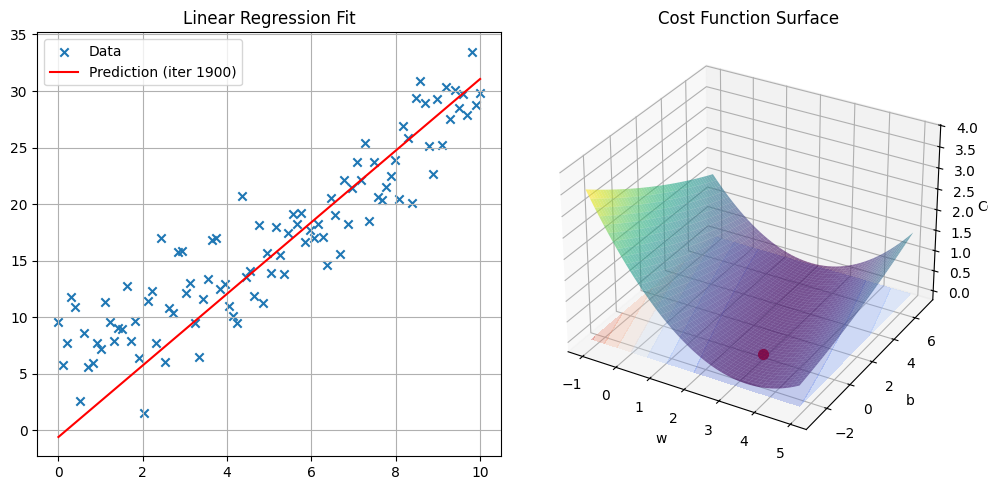

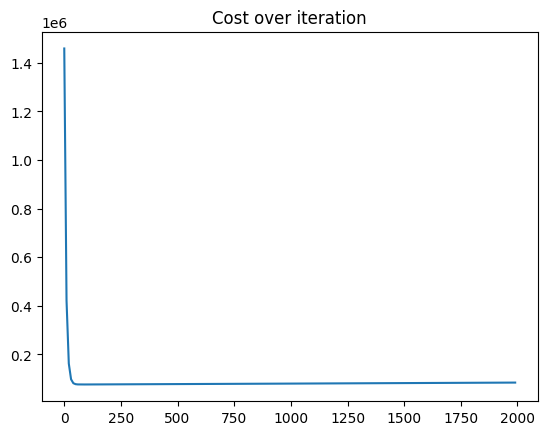

Final parameters: w = 3.1689, b = -0.6080, cost = 84505.4788


In [ ]:
gradient_descent(0, 0, 0.002, 2000)